# Gender Basied From the Letters That Exist in Name

Author: Jacqueline Jia

Course Project, UC Irvine, Math 10, F23

## Introduction

My goal is using a set of names and their corresponding gender of name, I wish to find if there is any correlation between the letters used in said name to indicate where any random name can be deteremented to be female or male. There are obvious limiation, as it's based from a list from the govenment which only implements male or females names, and any trans represtiation is most likly to be lost. There is also limitation where it comes to what we have, as there are many different ways to calculate this.

The way I should do this is by first cleaning the data, but also manipulating into a way in which we can be used for later. Because of the size of this data, I will also be only taking a portion of the total data.

## Adding new coulmns

As stated before, we are adding new columns while removing the ones that are completely useless for us.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("Names")

In [ ]:
df = df.drop('Count',axis = 1)

In [ ]:
#total_n will be our how much of the data we are going to take from the total data
total_n = 2000

In [ ]:
df_sample = df.copy()
df_sample = df_sample.sample(total_n,random_state = 108)

In [ ]:
size = []
for i in range(total_n):
    size.append(len(df_sample.iloc[i,0]))
#Now after having a list of size, we can add it back to the main dataset

df_sample = df_sample.assign(Size = size)
max_size = max(df_sample['Size']) #Because the max length is [], then make [] columns to add for this dataset

#Create an empty dataset with 0, which just helps for later, thus any names with less then the max will not be nun
for i in range(max_size):
    df_sample[f'Letter {i}'] = 0 

In [ ]:
#Now we got to do some dictionary shenanigans, which require dictionaries
#On a serious note, this is mostly to "number" everything, just so we can use things we learned in class
#This does limit what we can use, as these "number" aren't numbers, but we are placing vaule of how common these letters exist
Gender = {
    'F':1,
    'M':0
}

Letters = {
    24:'a',
    240: 'A',
    7:'b',
    700: 'B',
    14:'c',
    140: 'C',
    17:'d',
    170: 'D',
    26:'e',
    260: 'E',
    12:'f',
    120: 'F',
    9:'g',
    900: 'G',
    19:'h',
    190: 'H',
    23:'i',
    230: 'I',
    3:'j',
    300: 'J',
    5:'k',
    5: 'K',
    16:'l',
    160: 'L',
    13:'m',
    130: 'M',
    22:'n',
    220: 'N',
    21:'o',
    210: 'O',
    8:'p',
    800: 'P',
    4:'q',
    400: 'Q',
    18:'r',
    1800: 'R',
    20:'s',
    200: 'S',
    25:'t',
    250: 'T',
    15:'u',
    150: 'U',
    6:'v',
    600: 'V',
    11:'w',
    111: 'W',
    2:'x',
    200: 'X',
    10:'y',
    110: 'Y',
    1:'z',
    100: 'Z',
}

Numbers = {}
for a,b in Letters.items():
    Numbers[b] = a


In [ ]:
#This is used for a few things later
shape = df_sample.shape

In [ ]:
#Again, we just making the gender into something the system can read and something we can manpulate later. Note: Gender_no => Gender Number or No. 
df_sample['Gender_no'] = 0
for i in range(total_n):
    df_sample.iloc[i, shape[1]] = Gender[df_sample.iloc[i,1]]

In [ ]:
#The main goal here is to make every letter in it's own spot, making it easier to account for it separately
for i in range(total_n):
    for j in range(len(df_sample.iloc[i,0])):
        if df_sample.iloc[i,0][j] in Numbers:
            df_sample.iloc[i,4+j] = Numbers[df_sample.iloc[i,0][j]]
        else: 
            df_sample.iloc[i,4+j] = 1

#Note the else is here because '-' or special characters exist, and we aren't going to account for them
#Also yea, I know it takes a while, so don't put any super crazy total_n

## Testing Different Combinations of Tests and Inputs

Using what we have, we can start trying to apply different test to different aspects of this data to see if there is any sort of accuate representation to gender

In [ ]:
#First test is just based from size, even though we can probabily already guess that this isn't going to tell us much
# first we got to divide into 2 different sections, test and train
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import altair as alt 

X_train, X_test, y_train, y_test = train_test_split(df_sample[['Size']],df_sample['Gender'],test_size=.40,random_state=108)

clf = LogisticRegression()
clf.fit(X_train,y_train)

#We are also going to create a new Dataframe with all the predictions
df_pred = pd.DataFrame()
df_pred['Gender'] = df_sample['Gender']
df_pred['Size'] = df_sample['Size']
df_pred['pred_Size'] = clf.predict(df_sample[['Size']])

In [ ]:
clf.score(X_test, y_test) #This says that's is barely better then a coin flip, which is expected

0.5975

In [ ]:
c1 = alt.Chart(df_pred).mark_circle().encode(
    x = 'Size',
    y = 'pred_Size'
)

c2 = alt.Chart(df_pred).mark_circle().encode(
    x = 'Size',
    y = 'Gender'
)

alt.vconcat(c1,c2) 
#Again, makes sense. But at least we can see a reason as to why. 
#Gender isn't just caused by just the size of the name, and in genreal, there are more female names, hence the fact that it skewed towards to Female

alt.VConcatChart(...)

In [ ]:
#Now cause that was a bust, we are going to test this every letter
Letter_rows = []
for i in range(max_size): 
    Letter_rows.append(i+4)

X = df_sample.iloc[:, Letter_rows]
Y = df_sample['Gender_no']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=.5, random_state = 10)

rfc = RandomForestClassifier(n_estimators=75, max_depth=20,random_state=108)
rfc.fit(X_train,y_train)

rfc.score(X_test,y_test)
#After adjustment this n_est. and max_dep. this is the best we can get
#It better then before, but it's still lower then a 70%, and it's not something we can work with

0.677

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#This will just test the beginning letter of the name
X_train, X_test, y_train, y_test = train_test_split(df_sample[['Letter 0']],df_sample['Gender'],test_size=.50,random_state=108)

In [ ]:
#because we aren't working with numbers anymore, the use of leaves from Decision Tree is what we are going to use
df_err = pd.DataFrame()
df_err['leaves'] = []
df_err['error'] = []
df_err['set'] = []
df_err


for i in range(2,51):
    clf = DecisionTreeClassifier(max_leaf_nodes=i, random_state=108)
    clf.fit(X_train,y_train)
    test1 = 1 - clf.score(X_test,y_test)
    df_err = df_err.append({'leaves':i,'error':test1,'set':'train'},ignore_index=True)

for i in range(2,51):
    clf = DecisionTreeClassifier(max_leaf_nodes=i, random_state=108)
    clf.fit(X_test,y_test)
    test2 = 1 - clf.score(X_test,y_test)
    df_err = df_err.append({'leaves':i,'error':test2,'set':'test'},ignore_index=True)

In [ ]:
alt.Chart(df_err).mark_line().encode(
    x = 'leaves',
    y = 'error',
    color = 'set',
    tooltip = ['leaves','error']
)
# Pretty much from this alone, we can say that this is also not a way in which we accurately test our data using just the first letter.

alt.Chart(...)

In [ ]:
clf = DecisionTreeClassifier(max_leaf_nodes=40, random_state=108)
clf.fit(X_test,y_test)

clf.score(X_test,y_test) 
#Well again, we are bearly able to use this, however, what about the last letter?

0.62

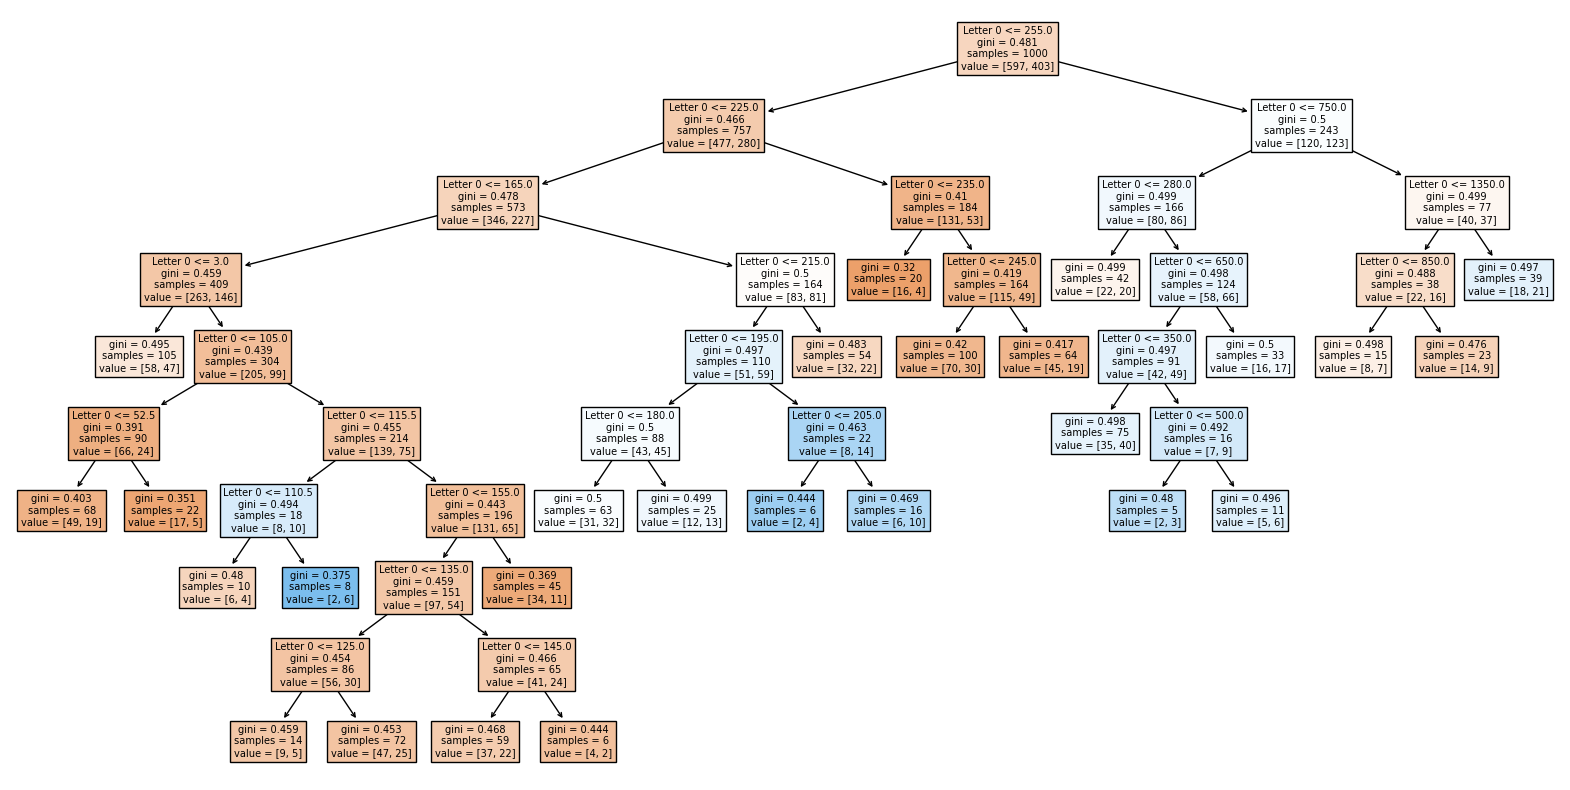

In [ ]:
fig = plt.figure(figsize=(20,10))
_ = plot_tree(clf, feature_names=clf.feature_names_in_, filled=True)

In [ ]:
Last_Letter = []
for i in range(total_n):
    Last_Letter.append(df_sample.iloc[i,3+df_sample.iloc[i,3]])
df_pred['Last_Letter'] = Last_Letter

X_train, X_test, y_train, y_test = train_test_split(df_pred[['Last_Letter']],df_pred['Gender'],test_size=.50,random_state=108)

clf = DecisionTreeClassifier(max_leaf_nodes=40, random_state=108)
clf.fit(X_test,y_test)

clf.score(X_test,y_test) #Well, again, it's still pretty bad, better, but maybe if we mix them together?

0.742

In [ ]:
#We are going to all aspects together
df_pred['Letter 0'] = df_sample['Letter 0']

In [ ]:
X = df_pred[['Letter 0', 'Last_Letter','Size']]
Y = df_pred['Gender']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.50,random_state=108)

In [ ]:
clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=108)
clf.fit(X_train,y_train)

clf.score(X_test,y_test)
#Welp, yea, no this sucks.

0.709

In [ ]:
#This lead to me being curious about if adding more letter give better answer
#(and when does it get worse because we know it does cause of the eariler test)
#so I tested it on just 1 to see that it already gets worse, so no need to write more code
Last_Letter_2 = []
for i in range(total_n):
    Last_Letter_2.append(df_sample.iloc[i,2+df_sample.iloc[i,3]])
df_pred['Last_Letter_2'] = Last_Letter_2

x = df_pred[['Letter 0', 'Last_Letter','Last_Letter_2', 'Size']]
y = df_pred['Gender']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.40,random_state=108)
clf = DecisionTreeClassifier(max_leaf_nodes=25, random_state=108)
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.7325

In [ ]:
#This also makes me interested if which position has the best score vaule

y = df_pred['Gender']
df_score = pd.DataFrame()
Letters_1 = []
for i in range(max_size): 
    Letters_1.append(i)
df_score['Letter'] = Letters_1
score = []

for i in range(max_size):
    x = df_sample[[f'Letter {i}', 'Size']]
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.40,random_state=108)
    clf = DecisionTreeClassifier(max_leaf_nodes=20, random_state=108)
    clf.fit(X_train,y_train)
    score.append(clf.score(X_test,y_test))

df_score['Score'] = score

c1 = alt.Chart(df_score).mark_bar().encode(
    x = alt.X('Letter', scale=alt.Scale(domain=[2,23])),
    y = alt.Y('Score', scale=alt.Scale(domain=[.5,.7]))
)
c1

alt.Chart(...)

In [ ]:
#Notice that the once above, that the there is a spike at 5, and my guess is that it's caused because it's the last letter
#I wasn't right, however, it's clear that the last parts of a name can be impactful towards a namew
size=[]
for i in range(max_size): 
    size.append(i+1)
total = []
for i in range(max_size): 
    total.append(sum(df_sample['Size'] == i))

Total = pd.DataFrame()

Total['Size'] = size
Total['Total'] = total

c2=alt.Chart(Total).mark_bar().encode(
    x = 'Size',
    y = 'Total'
)

alt.vconcat(c1,c2) 
#There is a very clear spike at 5 and 6, which corresponding nicely with the data.

alt.VConcatChart(...)

## Summary

Either summarize what you did, or summarize the results.  Maybe 3 sentences.

Well, I didn't find much given the types of test I did, which to be fair are quite base line. We can see that just given the length of a name, or just the first letter it's nearly impossible to guess gender. Given the last couple letter and it's length we can get a better idea of the gender of the name, and thus we can assume that the latter half has a very slight basis on the gender of a name. But again, this data depends on our sample, and isn't conclusive of anything.

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

https://www.kaggle.com/datasets/gracehephzibahm/gender-by-name

* List any other references that you found helpful.

These are just the website I used for help with the code

altair-viz.github
geeksforgeeks
stackenchange
pieriantraining
And the notes from Math 10

https://www3.nd.edu/~busiforc/handouts/cryptography/letterfrequencies.html
For the dictionary